In [28]:
import pandas as pd 
import datetime
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_excel("1644581323151_Indices IIP2011-12 Monthly_annual Dec 21 (1).xlsx")
df.tail(10)

,INDEX OF INDUSTRIAL PRODUCTION,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119
56,30,Manufacture of other transport equipment,1.776264,-6.1,0.7,-0.5,-1.5,-8.7,0.1,0.8,...,34.8,#,128.9,43,18.3,-6.3,-17.1,-15.7,-22.4,-11.3
57,31,Manufacture of furniture,0.131072,-2,7.4,12.5,5.1,10.7,9.1,10.6,...,1.4,#,95.9,9.1,2.5,-8.5,2.9,9.4,24.3,9.6
58,32,Other manufacturing,0.941497,8.5,16.5,39.4,16,21.1,0.2,20,...,50.8,#,135,46.4,69.4,69.6,57.4,38,3.1,34.4
59,Mining,NaN,14.372472,-0.9,2.9,-6.7,-10.2,-14.4,-17.5,-8.5,...,6.1,#,23.6,23.1,19.5,23.3,8.6,11.5,4.9,2.6
60,Manufacturing,NaN,77.63321,-1,5,3.7,3.3,2.3,1.9,5.6,...,28.4,#,32.1,13.2,10.5,11.1,4.3,3.1,0.8,-0.1
61,Electricity,NaN,7.994318,3,8.7,5.1,4.6,1.9,0.3,7.5,...,22.5,#,7.5,8.3,11.1,16,0.9,3.1,2.1,2.8
62,General,NaN,100,-0.7,5,2.3,1.5,-0.1,-1,3.7,...,24.2,#,27.6,13.8,11.5,13,4.4,4,1.3,0.4
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,# In view of the circumstances mentioned in th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,The figures are to be interpreted considering ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_mining =df.loc[df["INDEX OF INDUSTRIAL PRODUCTION"]=="Mining"]
df_mining.head()

,INDEX OF INDUSTRIAL PRODUCTION,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119
28,Mining,NaN,14.372472,99.1,102.9,93.3,89.8,85.6,82.5,91.5,...,139,107.6,108.3,105.5,104.6,103.6,95.1,109.8,111.8,120.3
59,Mining,NaN,14.372472,-0.9,2.9,-6.7,-10.2,-14.4,-17.5,-8.5,...,6.1,#,23.6,23.1,19.5,23.3,8.6,11.5,4.9,2.6


In [31]:
d1 = df_mining.iloc[1]
weight = d1[2]
weight

14.372472

In [32]:
len(d1)

120

In [33]:
import re
ls = [x if re.match("^\d+?\.\d+?$", str(x)) else 0 for x in d1[3:] ]
res = [(pd.to_numeric(x)*weight/100) + weight for x in ls] 
res
len(res)

117

In [34]:
dates = df.iloc[35]
date  = [x for x in dates[3:]]

In [35]:

data= {"Date":date,"Mining":res}
df_new = pd.DataFrame(data)
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new = df_new.set_index('Date')
df_new = df_new.sort_values(by='Date')
df_new.head()

,Mining
Date,
2012-04-11,14.372472
2012-05-11,14.789274
2012-06-11,14.372472
2012-07-11,14.372472
2012-08-11,14.372472


In [36]:
type(df_new['Mining'])

pandas.core.series.Series

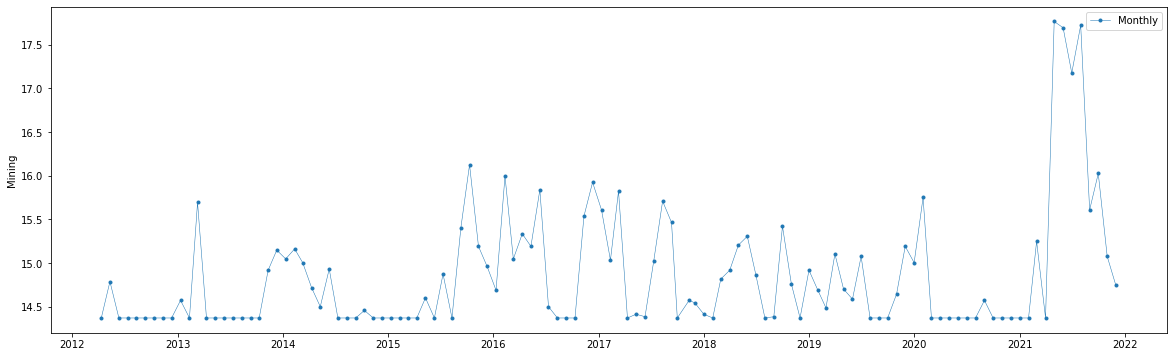

In [37]:
import matplotlib.pyplot as plt
y = df_new['Mining']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Monthly')
#ax.plot(y.resample('Q').mean(),marker='o', markersize=8, linestyle='-', label='Quarterly Mean Resample')
ax.set_ylabel('Mining')
ax.legend();

In [38]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq',freq=12)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

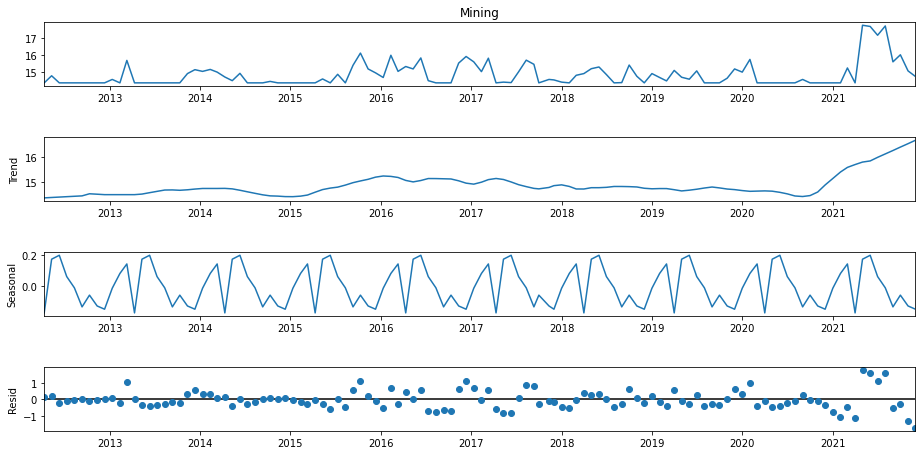

In [39]:
seasonal_decompose(y)

In [40]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

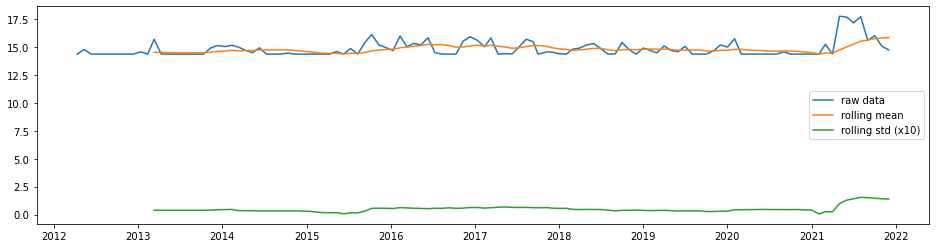

In [41]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

In [42]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [43]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -4.489
P-value = 0.000
Critical values :
	1%: -3.489589552580676 - The data is  stationary with 99% confidence
	5%: -2.887477210140433 - The data is  stationary with 95% confidence
	10%: -2.580604145195395 - The data is  stationary with 90% confidence


 > Is the de-trended data stationary ?
Test statistic = -3.980
P-value = 0.002
Critical values :
	1%: -3.502704609582561 - The data is  stationary with 99% confidence
	5%: -2.8931578098779522 - The data is  stationary with 95% confidence
	10%: -2.583636712914788 - The data is  stationary with 90% confidence


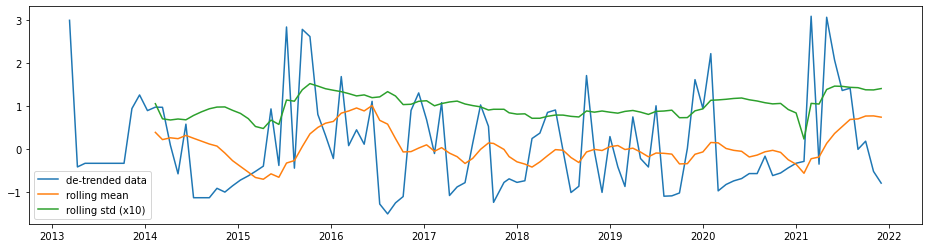

In [44]:
# Detrending
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

 > Is the 1 lag differenced data stationary ?
Test statistic = -5.373
P-value = 0.000
Critical values :
	1%: -3.50434289821397 - The data is  stationary with 99% confidence
	5%: -2.8938659630479413 - The data is  stationary with 95% confidence
	10%: -2.5840147047458037 - The data is  stationary with 90% confidence


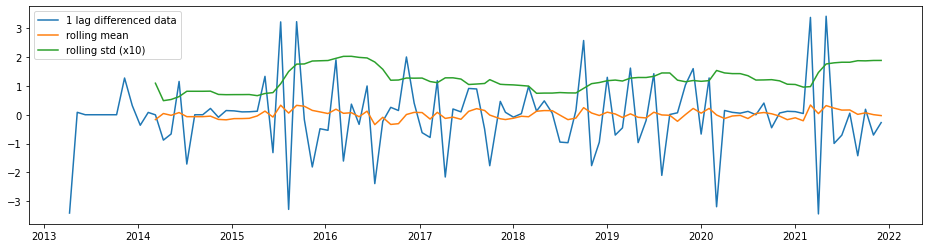

In [45]:
# Differencing
y_1lag =  y_detrend - y_detrend.shift(1)

test_stationarity(y_1lag,'1 lag differenced data')
ADF_test(y_1lag,'1 lag differenced data')


In [46]:
# Detrending + Differencing

#y_4lag_detrend =  y_1lag - y_1lag.shift(4)

#test_stationarity(y_4lag_detrend,'4 lag differenced de-trended data')
#ADF_test(y_4lag_detrend,'4 lag differenced de-trended data')


In [47]:
len(y['2020-06-01':])

19

In [48]:
y_to_train = y[:'2020-06-01'] # dataset to train
y_to_val = y['2020-06-01':] # last X months for test  
predict_date = len(y) - len(y[:'2020-06-01']) # the number of data points for the test set

In [49]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                l=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [50]:
sarima_grid_search(y,12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

The set of parameters with the minimum AIC is: SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:196.19356470398552


In [51]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5989      0.102      5.880      0.000       0.399       0.799
ma.L1         -1.0000    229.920     -0.004      0.997    -451.635     449.635
ma.S.L12      -0.5321      0.176     -3.030      0.002      -0.876      -0.188
sigma2         0.2806     64.517      0.004      0.997    -126.170     126.731


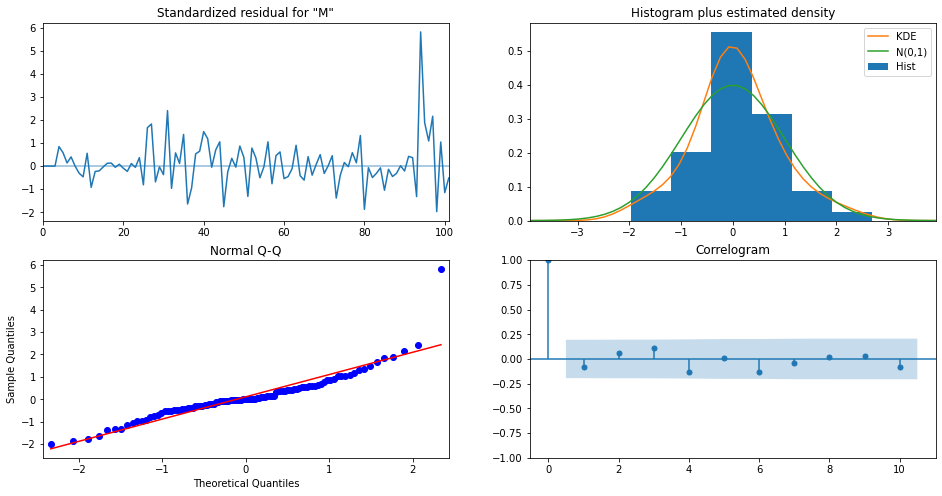

The Root Mean Squared Error of SARIMA with season_length=18 and dynamic = False 0.89


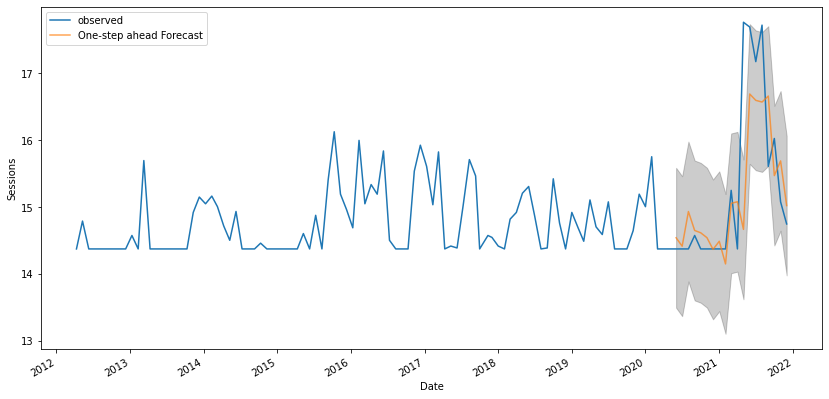

The Root Mean Squared Error of SARIMA with season_length=18 and dynamic = True 1.3


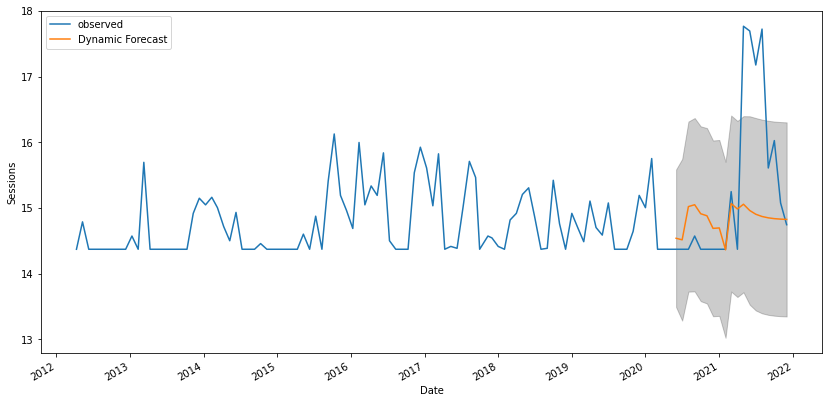

In [53]:
model = sarima_eva(y,(1, 1, 1),(0, 0, 1, 12),predict_date,'2020-06-01',y_to_val)